In [157]:
# Importing all the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Data Collection

In [158]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Fraud_Prediction/main/Fraud_check.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Data Preparation

### Data Cleaning

In [159]:
data['Taxable.Income'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


Assuming individuals with taxable income less than or equal to 30000 are labeled as "Risky," while others are labeled as "Good." Therefore, the column values are adjusted accordingly.

In [160]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

Observing that the column names are not appropriately formatted, we will proceed to update them.

In [161]:
data.rename(columns = {'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'taxable_income',
                      'City.Population':'city_population','Work.Experience':'work_experience','Urban':'urban'},inplace = True)
data.columns

Index(['undergrad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'urban'],
      dtype='object')

In [162]:
data.shape

(600, 6)

The dataset comprises 600 rows and 6 columns.

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   undergrad        600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    object
 3   city_population  600 non-null    int64 
 4   work_experience  600 non-null    int64 
 5   urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


We possess 2 integer-type variables and 4 object-type variables; hence, it is necessary to transform the categorical variables into numerical format for the purpose of model building.

In [164]:
data.isnull().sum()

undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
urban              0
dtype: int64

There are no missing values in the dataset.

In [165]:
data.describe()

,city_population,work_experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


### Data Cleaning and Visualization

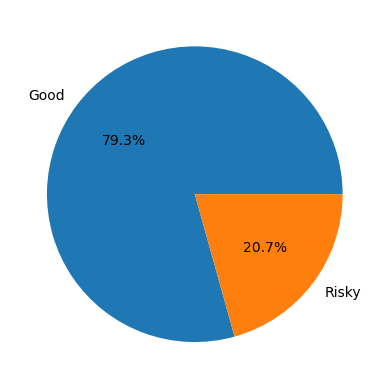

In [166]:
count = data.groupby('taxable_income')['taxable_income'].count()
plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.show()

Observing the distribution, it's evident that 'good' constitutes 79.3%, while 'risky' makes up 20.7%, indicating an uneven distribution in the data.

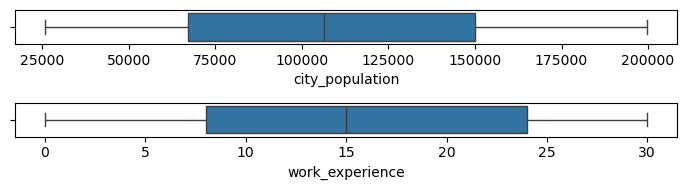

In [167]:
fig, axs = plt.subplots(2,1, figsize = (7,2))

sns.boxplot(data, x = 'city_population', ax = axs[0])
sns.boxplot(data, x = 'work_experience', ax = axs[1])

plt.tight_layout()
plt.show()

We can see that there are no outliers in the data.

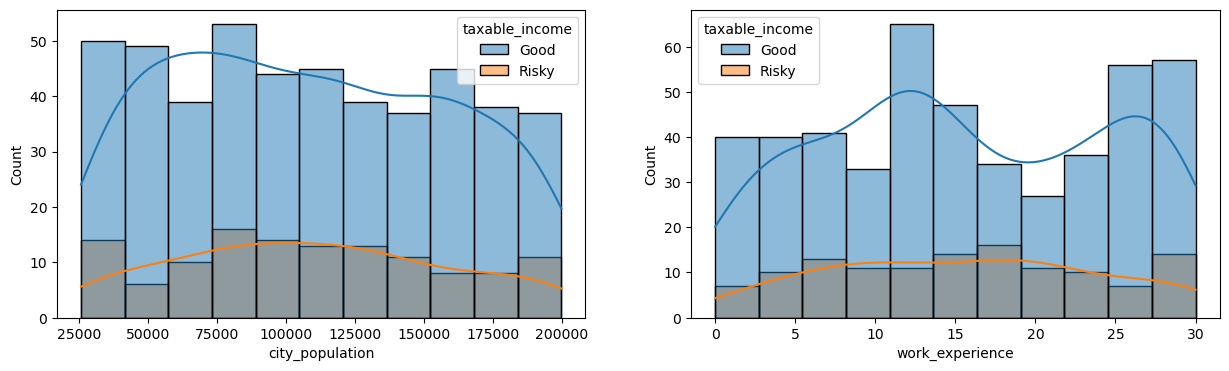

In [168]:
fig, axs = plt.subplots(1,2, figsize = (15,4))

sns.histplot(data, x = 'city_population', hue = 'taxable_income', kde = True, ax = axs[0])
sns.histplot(data, x = 'work_experience', hue = 'taxable_income', kde = True, ax = axs[1])

plt.show()

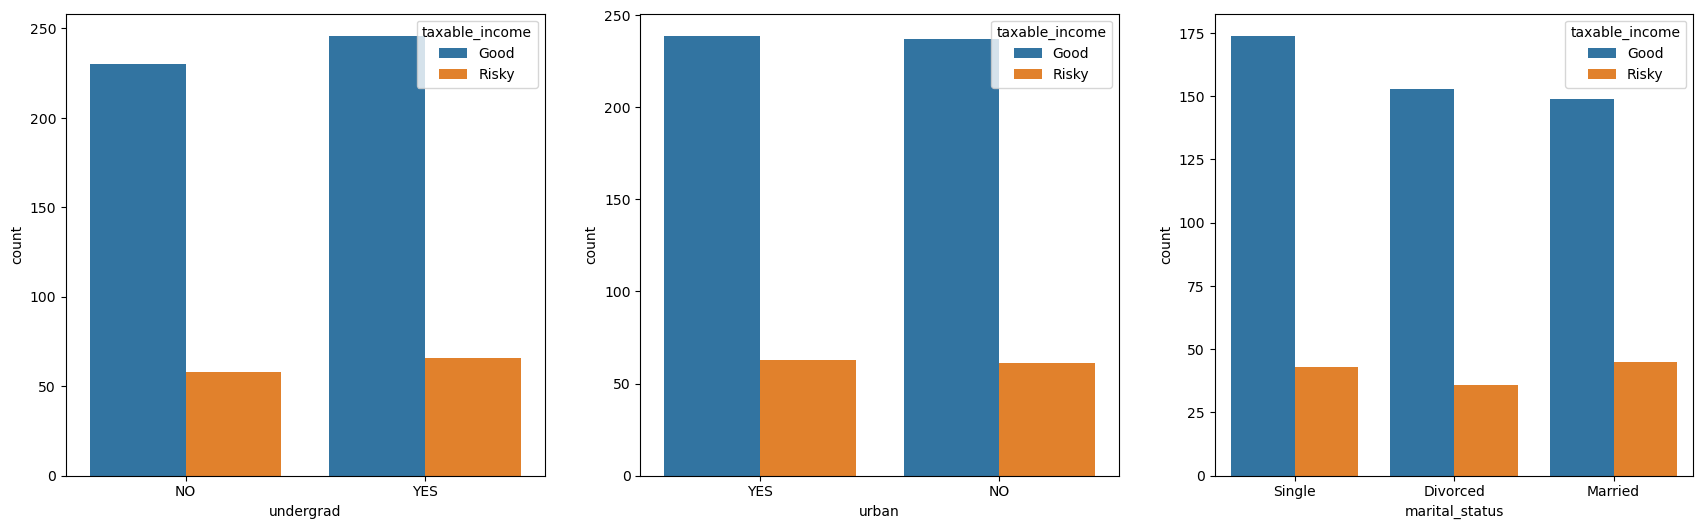

In [169]:
fig, axs = plt.subplots(1,3, figsize = (21,6))

sns.countplot(data, x = 'undergrad', hue = 'taxable_income', ax = axs[0])
sns.countplot(data, x = 'urban', hue = 'taxable_income', ax = axs[1])
sns.countplot(data, x = 'marital_status', hue = 'taxable_income', ax = axs[2])

plt.show()

### Feature Engineering

In [171]:
cat_data = [var for var in data.columns if data[var].dtype == 'object']
encoder = LabelEncoder()

for col in cat_data:
    data[col] = encoder.fit_transform(data[col])
    
data.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


### Data Splitting

In [183]:
X = data.drop('taxable_income', axis = 1)
y = data['taxable_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, stratify = y)

print('X_train -',X_train.shape)
print('y_train -',y_train.shape)
print('X_test -',X_test.shape)
print('y_test -',y_test.shape)

X_train - (450, 5)
y_train - (450,)
X_test - (150, 5)
y_test - (150,)


We have divided our data into training and testing sets.

## Model Selection - Random Forest

## Model Training

In [184]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Model Evaluation

Accuracy Score - 0.78

Classification Report -
               precision    recall  f1-score   support

           0       0.79      0.97      0.88       119
           1       0.25      0.03      0.06        31

    accuracy                           0.78       150
   macro avg       0.52      0.50      0.47       150
weighted avg       0.68      0.78      0.71       150


Confusion Matrix -
 [[116   3]
 [ 30   1]]


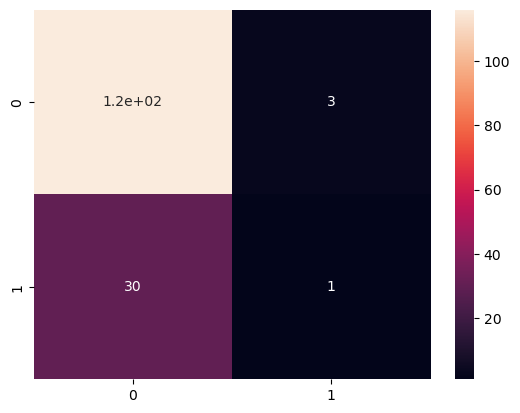

In [187]:
y_pred = rfc.predict(X_test)

print('Accuracy Score -',round(accuracy_score(y_test,y_pred),2))
print('\nClassification Report -\n',classification_report(y_test,y_pred))

conf = confusion_matrix(y_test,y_pred)

print('\nConfusion Matrix -\n',conf)

sns.heatmap(conf,annot = True)
plt.show()